AUTOREGRESSIVE MOVING AVERAGE MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [2]:
def stationarityCheck(var):
    check = adfuller(var)
    print('ADF stat : %f' % check[0])
    print('p-value : %f' % check[1])
    print('Critical Values :')
    for key, val in check[4].items():
        print('%s : %.3f' % (key, val))

In [3]:
df=pd.read_csv('sales.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
df["date"]=pd.to_datetime(df["date"], format="%Y-%m-%d")
df.set_index("date", inplace=True)

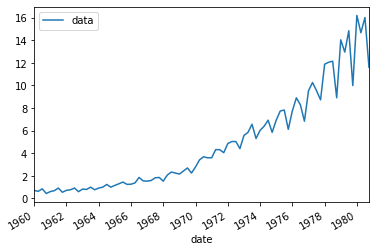

In [5]:
df.plot()

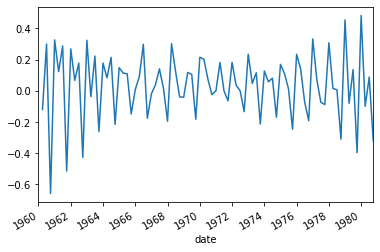

In [6]:
df['LDiff']=(np.log(df['data'])).diff()
df['LDiff'].plot()

In [7]:
df.dropna(inplace=True)
stationarityCheck(df['LDiff'].values)

ADF stat : -4.317044
p-value : 0.000415
Critical Values :
1% : -3.518
5% : -2.900
10% : -2.587


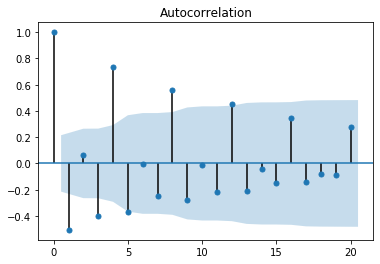

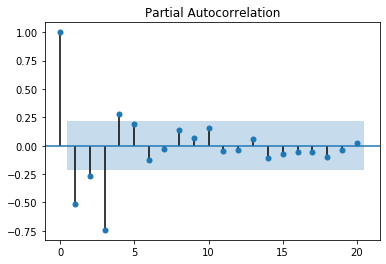

In [8]:
plot_acf(df['LDiff']);
plot_pacf(df['LDiff']);

In [9]:
period=12
X = df['LDiff']
train = X[1:len(X)-period]
test = X[len(X)-period:]

In [10]:
model = ARMA(X, order=(3,8))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train)+1,end=len(train) + len(test),dynamic=False)
model_fit.summary()

C:\Users\m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  LDiff   No. Observations:                   83
Model:                     ARMA(3, 8)   Log Likelihood                  86.761
Method:                       css-mle   S.D. of innovations              0.081
Date:                Mon, 05 Apr 2021   AIC                           -147.521
Time:                        14:10:10   BIC                           -116.076
Sample:                             0   HQIC                          -134.888
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0377      0.005      7.854      0.000       0.028       0.047
ar.L1.LDiff    -0.9657      0.043    -22.558      0.000      -1.050      -0.882
ar.L2.LDiff    -0.9381      0.051    -18.225      0.000      -1.039      -0.837
ar.L3.LDiff    -0.9545      0.036    -26.692      0.000      -1.025      -0.884
ma.L1.LDiff     0.2217      0.124      1.789      0.074      -0.021       0.465
ma.L2.LDiff     0.2903      0.121      2.393      0.017       0.053       0.528
ma.L3.LDiff     0.0600      0.119      0.504      0.615      -0.173       0.293
ma.L4.LDiff    -0.0979      0.114     -0.857      0.391      -0.322       0.126
ma.L5.LDiff    -0.0105      0.106     -0.099      0.921      -0.219       0.198
ma.L6.LDiff     0.0751      0.109      0.690      0.490      -0.138       0.288
ma.L7.LDiff     0.3597      0.118      3.044      0.002       0.128       0.591
ma.L8.LDiff     0.2047      0.119      1.717      0.086      -0.029       0.438
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0091           -0.0000j            1.0091           -0.5000
AR.2            0.0131           -1.0188j            1.0189           -0.2480
AR.3            0.0131           +1.0188j            1.0189            0.2480
MA.1            1.0187           -0.5073j            1.1380           -0.0735
MA.2            1.0187           +0.5073j            1.1380            0.0735
MA.3            0.2041           -1.0496j            1.0693           -0.2194
MA.4            0.2041           +1.0496j            1.0693            0.2194
MA.5           -0.6122           -1.0346j            1.2022           -0.3350
MA.6           -0.6122           +1.0346j            1.2022            0.3350
MA.7           -1.4891           -0.2556j            1.5109           -0.4729
MA.8           -1.4891           +0.2556j            1.5109            0.4729
-----------------------------------------------------------------------------
"""

In [11]:
compare = pd.concat([predictions.rename('LDiffrenced Predictions'),
                     df['data'].rename('Actual'),
                     df['LDiff'].rename('Log Difference')], axis=1)

In [12]:
compare['Predictions'] = np.exp((compare['LDiffrenced Predictions'] + (np.log(compare['Actual'])).shift(1)))

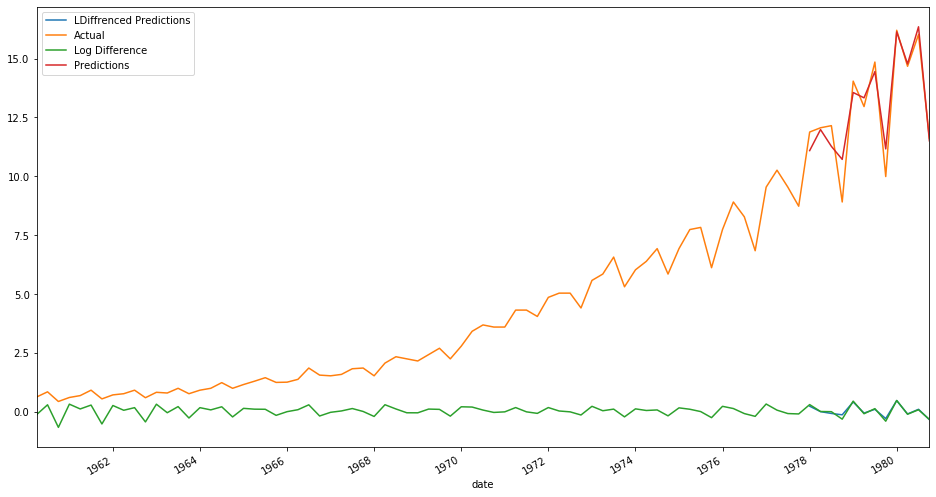

In [13]:
compare.plot(figsize=(16, 9))

In [14]:
rmse=((compare['Predictions']-compare['Actual'])**2).mean()**0.5
rmse

0.7480498734704121

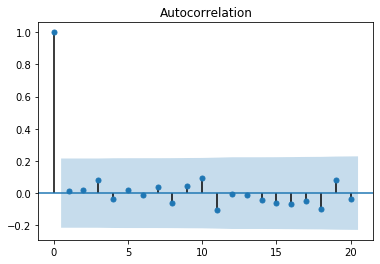

In [15]:
plot_acf(model_fit.resid);

------------------------------------------

Different difference | Different lags | Upper & Lower Bound | Ljung–Box test on residuals | Move forward

------------------------------------------